<a href="https://colab.research.google.com/github/MEPritchard/EduPerformance/blob/main/eduperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data From Github orginally from Kaggle
https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
url_math = "https://github.com/MEPritchard/EduPerformance/raw/main/student_math_clean.csv"
url_portugese = "https://github.com/MEPritchard/EduPerformance/raw/main/student_portuguese_clean.csv"

In [110]:
df1 = pd.read_csv(url_math)
df2 = pd.read_csv(url_portugese)

In [111]:
#Most of the data from df2 is repative, save grades and absences. Manually drop all columns between student_id and abscenses.
df2 = df2.drop(df2.columns[1:30], axis = 1)


In [112]:
merged_df = pd.merge(df1, df2, on='student_id')

In [113]:
def index_unique_responses(dataframe):
    """
    Iterate through each column in a DataFrame. If the data type of the column is object,
    it lists unique values and indexes each unique response from 1 to n.

    Returns:
    - DataFrame with unique responses indexed from 1 to n for object-type columns
    """
    def index_column(column):
        unique_values = column.unique()
        mapping = {value: index+1 for index, value in enumerate(unique_values)}
        return column.map(mapping)

    indexed_dataframe = dataframe.copy()
    for column in indexed_dataframe.columns:
        if indexed_dataframe[column].dtype == 'object':
            indexed_dataframe[column] = index_column(indexed_dataframe[column])
    return indexed_dataframe

In [114]:
merged_df=index_unique_responses(merged_df)

In [115]:
#Covert df to a matrix or correlated values.
corr_df = merged_df.corr()
corr_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,weekend_alcohol,health,absences_x,grade_1_x,grade_2_x,final_grade_x,absences_y,grade_1_y,grade_2_y,final_grade_y
student_id,1.000000,0.555593,-0.075995,0.758057,0.224469,0.016317,0.064132,0.083850,0.018298,-0.056216,...,0.095454,-0.088902,0.065966,0.046963,-0.053344,-0.099991,0.044881,0.060639,0.081670,0.138287
school,0.555593,1.000000,-0.012286,0.377610,0.279797,0.064866,0.045923,-0.047448,-0.022447,-0.056670,...,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017,-0.098131,0.058010,0.073109,0.148096
sex,-0.075995,-0.012286,1.000000,-0.028606,0.028504,0.089862,0.023443,-0.090204,0.024681,0.191421,...,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456,-0.002396,-0.046036,-0.097903,-0.107537
age,0.758057,0.377610,-0.028606,1.000000,0.146722,0.037847,0.029598,0.084276,0.014739,-0.069104,...,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,0.027855,0.014470,0.085759,0.121660
address_type,0.224469,0.279797,0.028504,0.146722,1.000000,-0.072472,0.042572,0.061184,-0.070924,-0.108818,...,0.101126,0.040355,0.027874,-0.069704,-0.126037,-0.105756,0.095327,0.003912,-0.010377,0.010417


<Axes: >

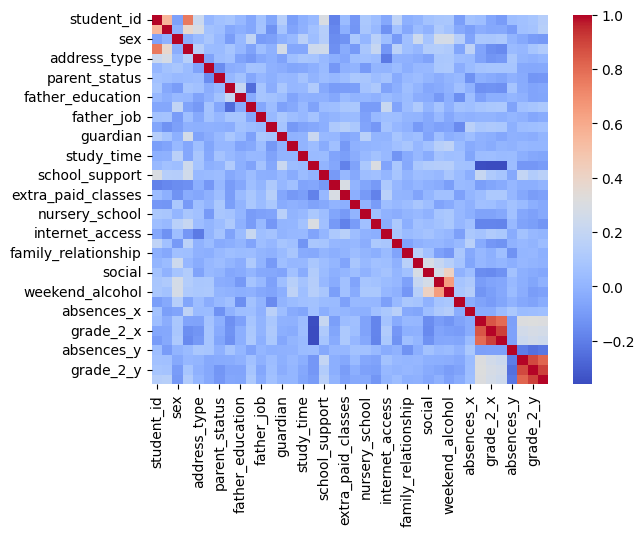

In [118]:
sns.heatmap(corr_df, cmap='coolwarm')

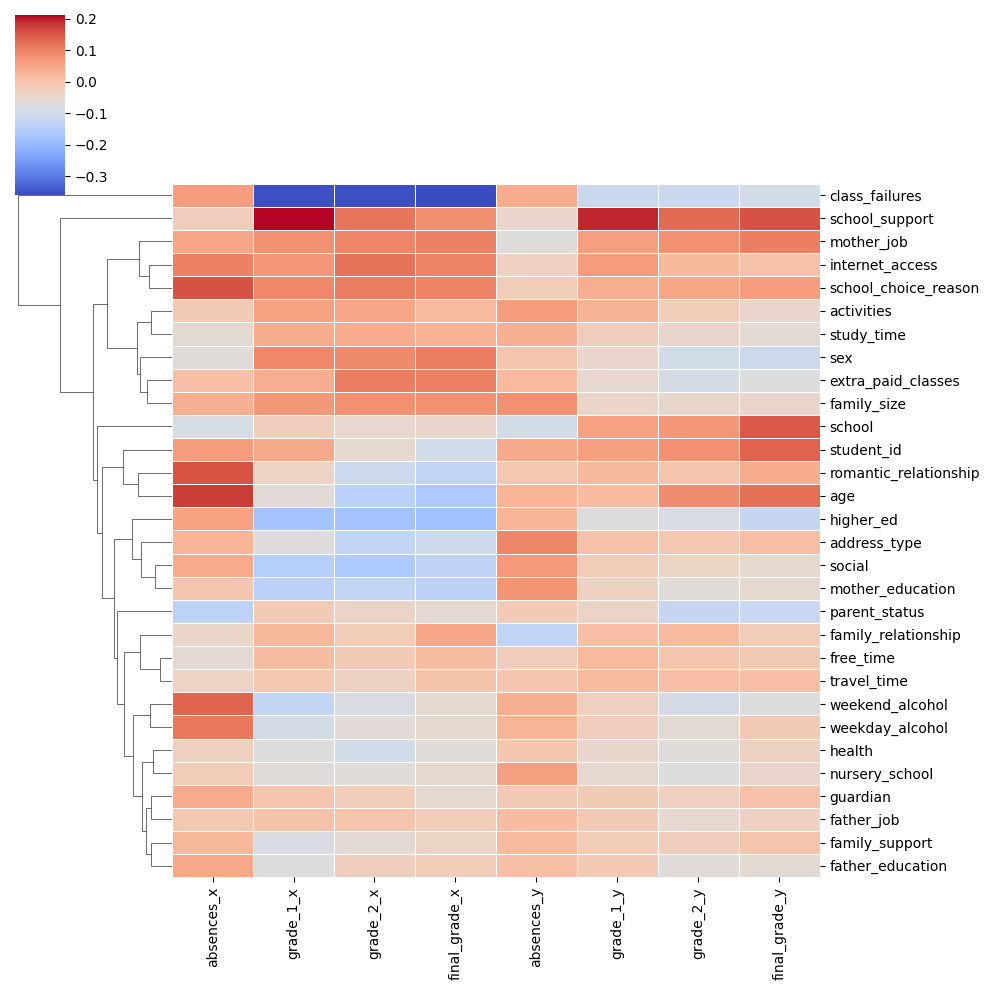

In [116]:
df = pd.DataFrame(corr_df)

# Select the last 6 columns for the y-axis and the first 28 columns for the x-axis
df_clustermap = df.iloc[:, :30]

# Create the clustermap
sns.clustermap(df_clustermap.T.iloc[::-1, -8:], row_cluster=True, col_cluster=False, cmap='coolwarm',linewidths=.5)

plt.show()

The strongest correlation in the dataset pretaining to grades is the class failures metric. This is still a weak corrolation. School support was competive in this report showing a weak corrolation to grade_1 _x and _y. There is also a weak corrolation between grade_1 and final_grade.

Alcohol had little effect of grades but as an administrator i would be concerned about weekend drinking, then bleeding into weekday drinking and absences.